In [1]:
%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
from neuronunit.optimisation.optimization_management import test_all_objective_test
import make_sim_tests
import numpy as np
from IPython.display import display, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import check_binary_match
from neuronunit.optimisation.optimization_management import inject_and_plot_model, TSD
import pandas as pd

# Simulated Data 
and select model parameters that are free to vary


In [2]:
%%capture
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.tests.fi import RheobaseTestP

params = MODEL_PARAMS["HH"];
fps = params.keys()#['C','peak_v','b']
model_type="HH"
sim_tests, OM, target = make_sim_tests.test_all_objective_test(fps,model_type=model_type)


# The Optimization Below Uses Too many free model parameters
To get good results in a short amount of time.

{'value': array(78.57142857) * pA}
CPU times: user 148 ms, sys: 129 ms, total: 277 ms
Wall time: 1.46 s


{'value': array(112.5) * pA}
CPU times: user 976 ms, sys: 0 ns, total: 976 ms
Wall time: 973 ms


RheobaseTestP


# Meta Parameters

<Figure size 640x480 with 0 Axes>

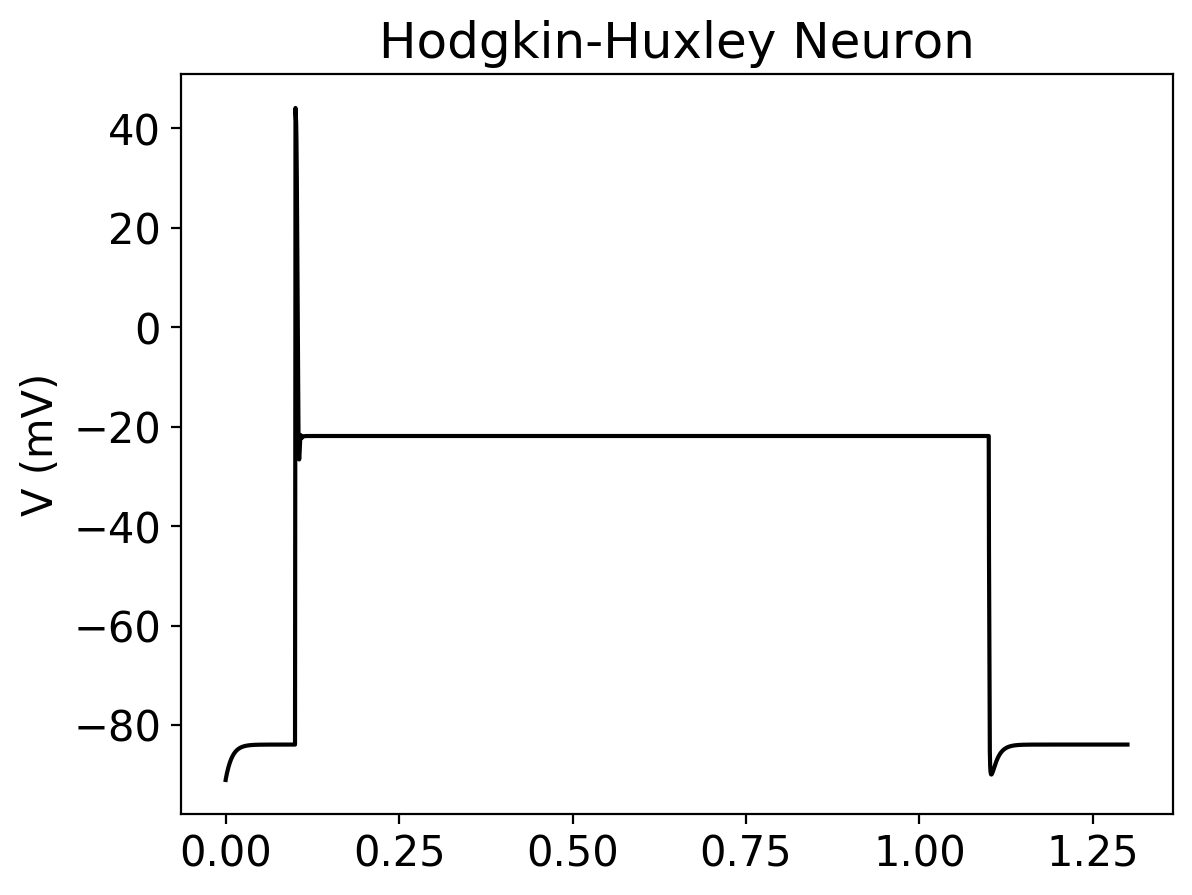

In [6]:
MU = 8 
NGEN = 50
_,plt = inject_and_plot_model(target)
plt.show()

# Fit the HH model to an Izhi 
Generated waveform.
would probably speed this up substantially
Uncomment optimization_management 857-865

In [7]:


results = sim_tests.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)


GA Generation Progress: 100%|██████████| 49/49 [1:19:06<00:00, 96.86s/it] 


In [8]:
opt = results['pf'][0].dtc
OM.tests = opt.tests
opt = OM.format_test(opt)
opt.self_evaluate()
opt = OM.get_agreement(opt)
display(opt.agreement)
params = MODEL_PARAMS["HH"]
params

,RheobaseTestP,TimeConstantTest,RestingPotentialTest,InputResistanceTest,CapacitanceTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,112.5 pA,113.70727551072301 ms,-83.91111448299453 mV,9343625661.668552 kg*m**2/(s**3*A**2),1.216950246382383e-11 s**4*A**2/(kg*m**2),0.005145833333333334 s,126.49033852011942 mV,-82.38319636902165 mV,NaN
predictions,78.57142857142857 pA,115.46703066997743 ms,-97.49100427955644 mV,19574421584.32377 kg*m**2/(s**3*A**2),5.8988731887970334e-12 s**4*A**2/(kg*m**2),0.005254166666666667 s,123.22597891221997 mV,-95.52877403664681 mV,NaN
scores,0.17171,0.00619318,3.27997,131.8,0.227293,0.0084341,0.0103487,0.0657021,681.117712


{'E_L': (-32.5, -97.5),
 'E_K': (-45.0, -135.0),
 'E_Na': (25.0, 75.0),
 'g_L': (0.05, 0.15000000000000002),
 'g_K': (3.0, 9.0),
 'g_Na': (100.0, 300.0),
 'C_m': (0.5, 1.5),
 'vr': (-34.4673, -103.40190000000001),
 'Vr': (-32.5, -97.5)}

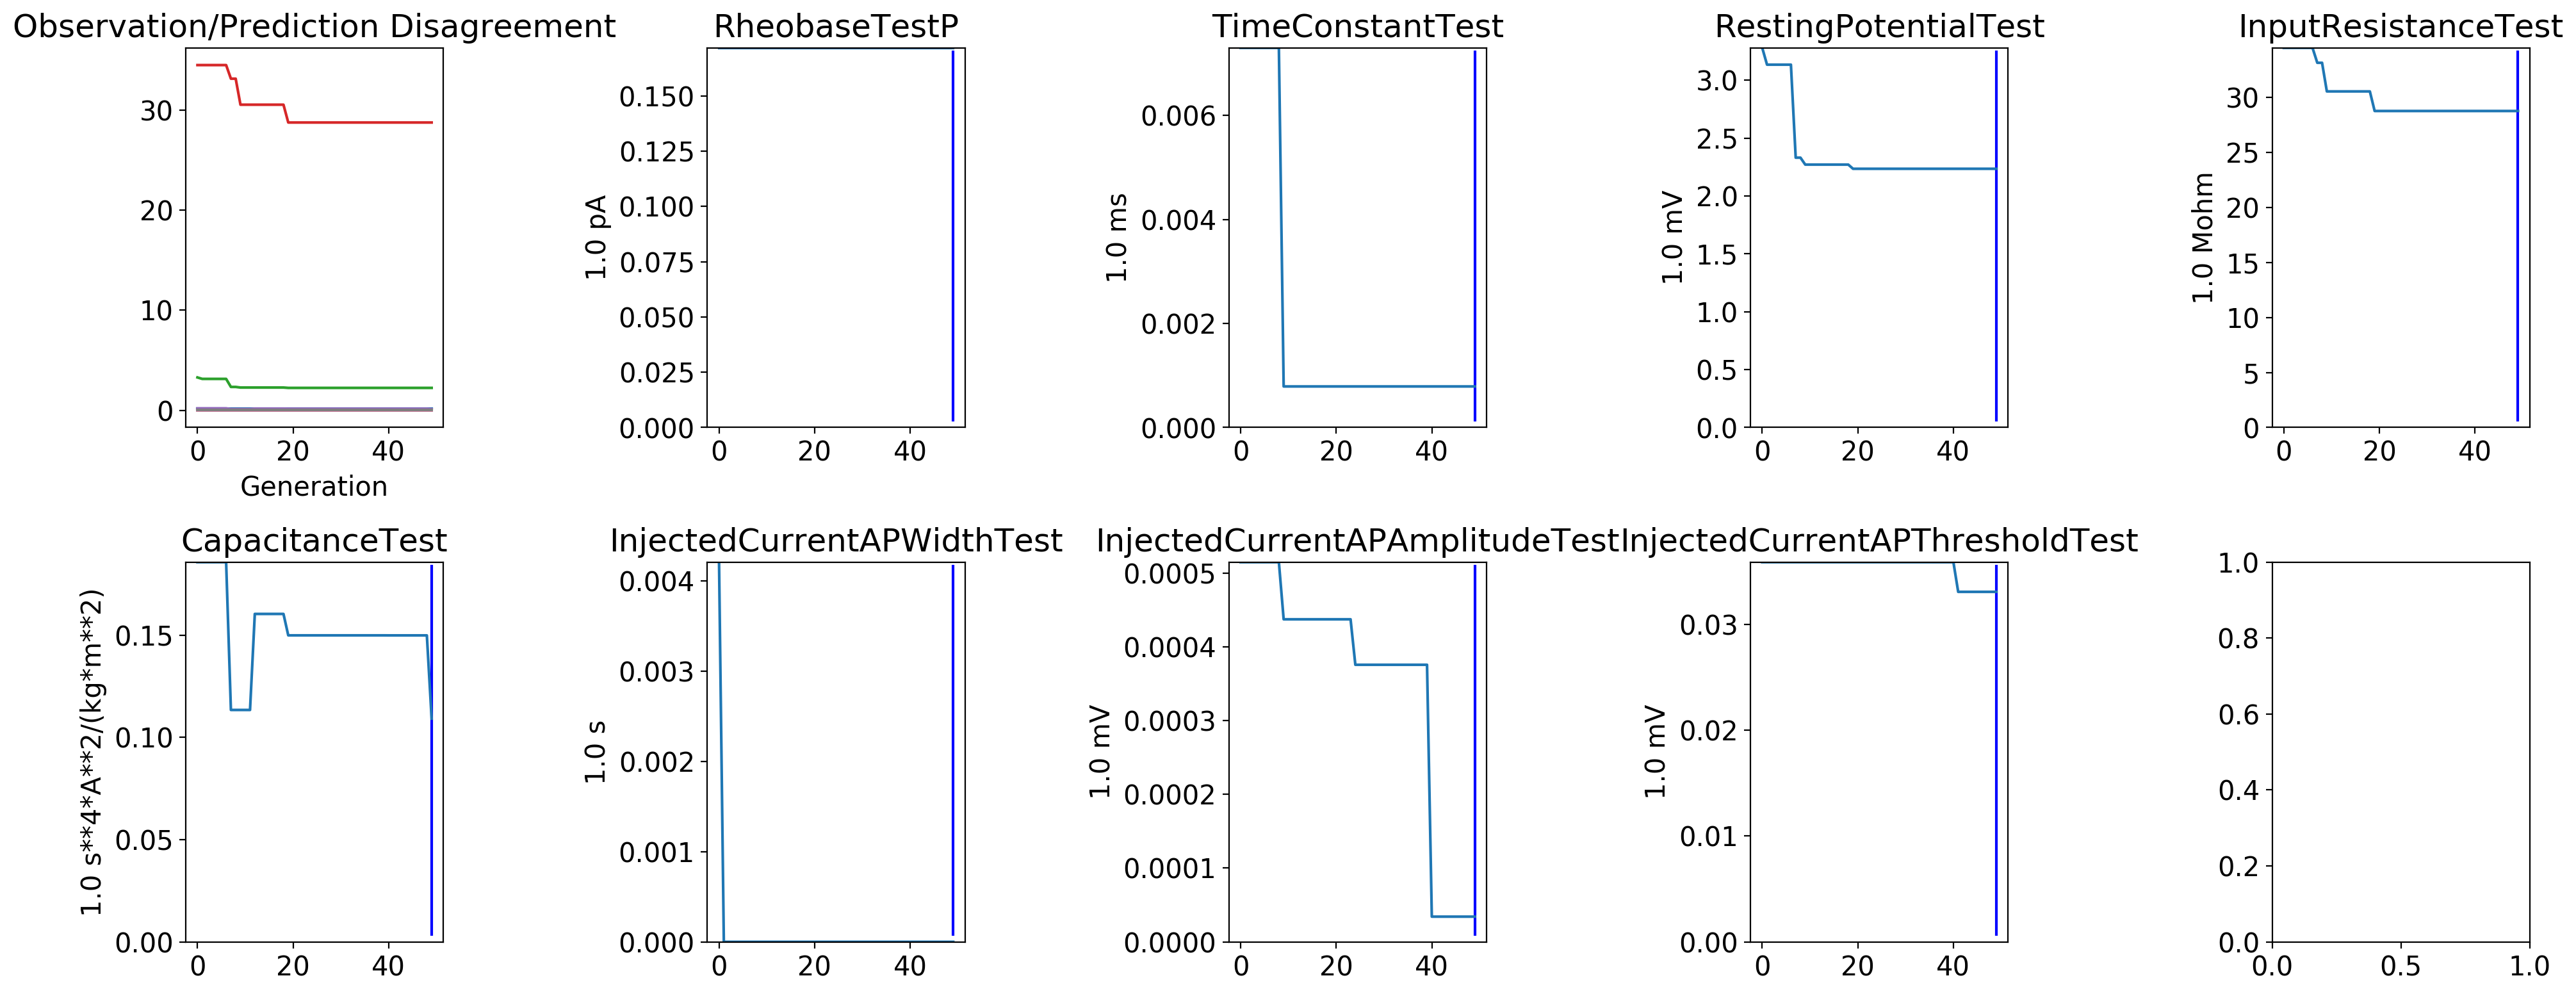

In [9]:

plt = plot_score_history1(results)
plt.show()


<Figure size 640x480 with 0 Axes>

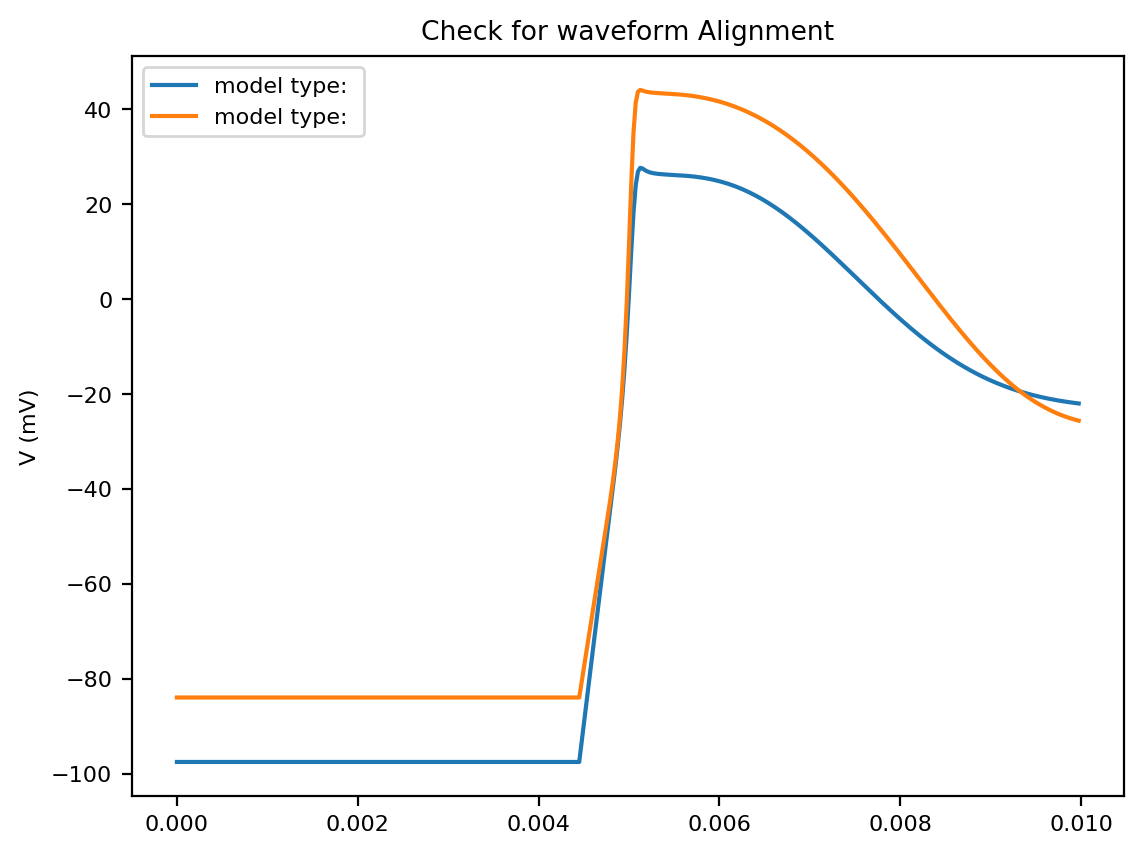

In [10]:
model = target.dtc_to_model()
check_binary_match(opt,target,snippets=True)
target = OM.format_test(target)
simulated_data_tests = target.tests
#


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

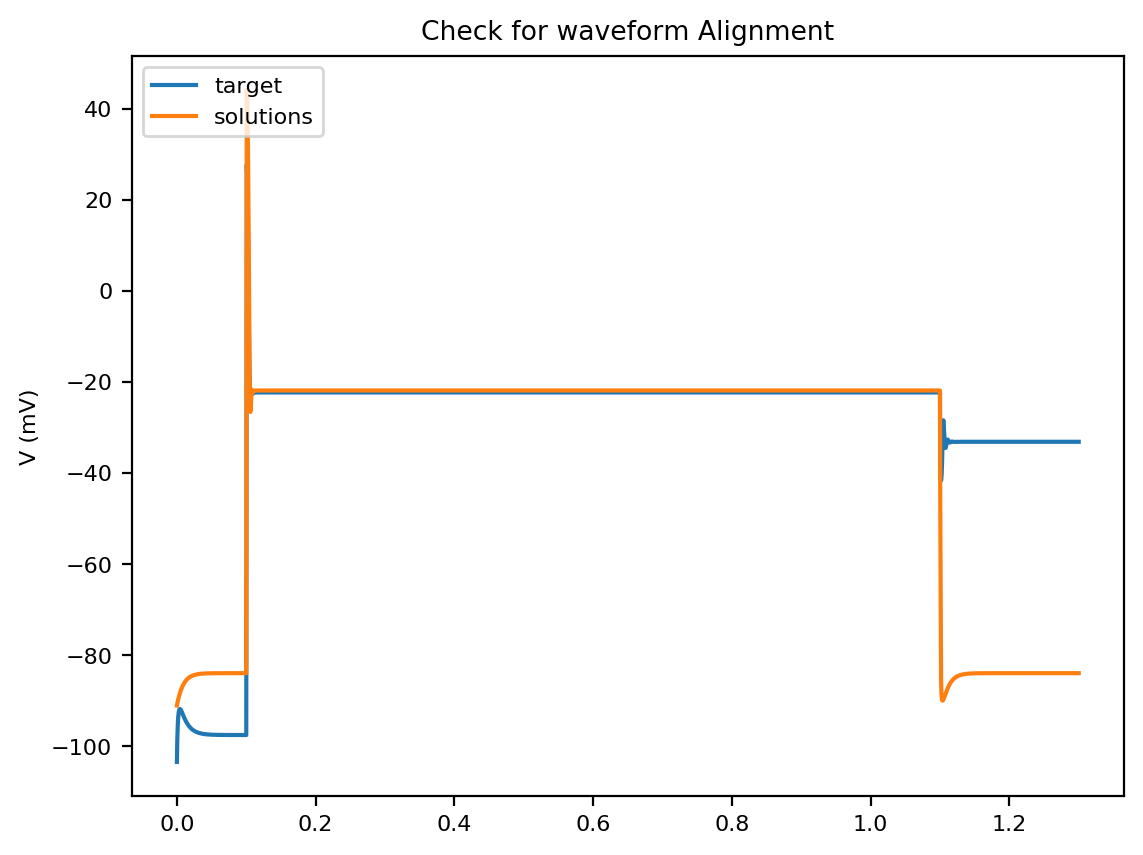

In [11]:
check_binary_match(opt,target,snippets=False)


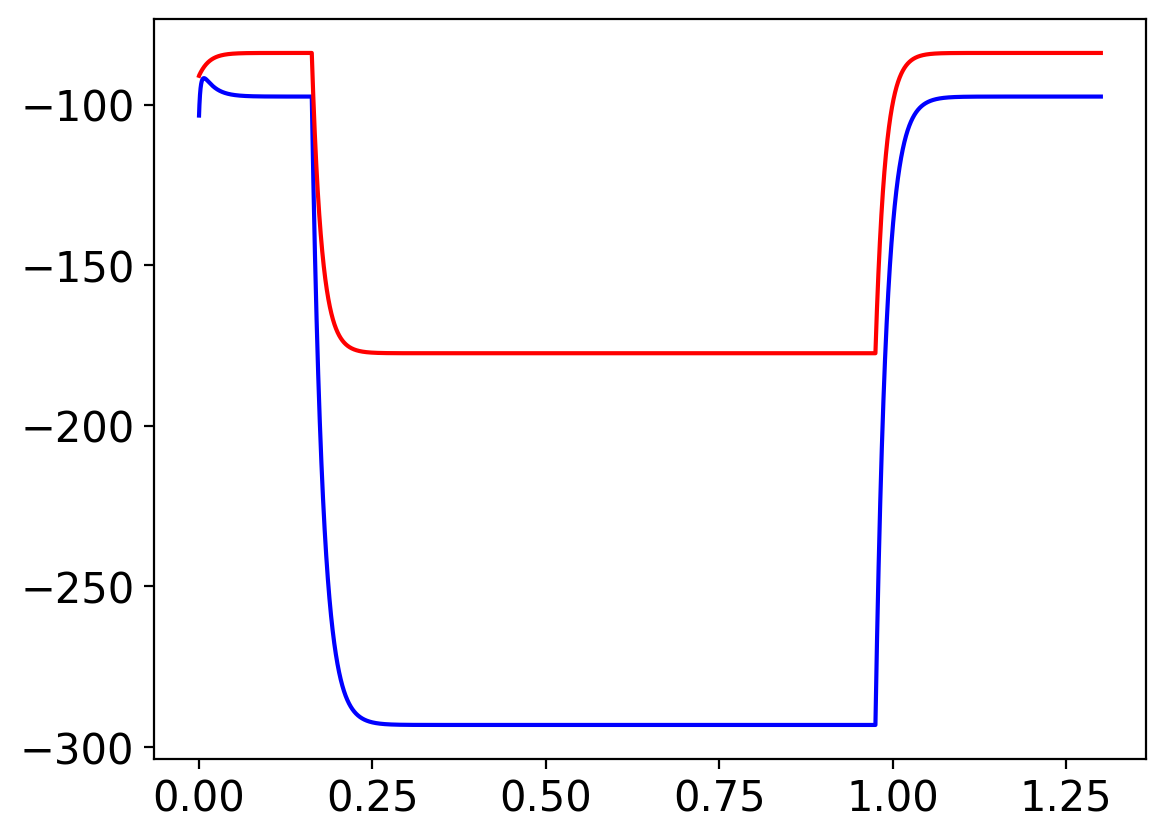

In [39]:

import quantities as pq
tm = target.dtc_to_model()

model = opt.dtc_to_model()
uc = {'amplitude':-10*pq.pA,'duration':500*pq.ms,'delay':100*pq.ms}
model.inject_square_current(uc)
vm1 = model.get_membrane_potential()
tm.inject_square_current(uc)
vm0 = tm.get_membrane_potential()
plt.plot(vm1.times, vm1.magnitude, c='b',label=str('opt ADEXP'))#+str(model.attrs['a']))
plt.plot(vm0.times, vm0.magnitude, c='r',label=str('target HH'))#+str(model.attrs['a']))

plt.show()


In [12]:
display(pd.DataFrame([opt.attrs]))
import copy
temp = {}
for k in opt.attrs.keys():
    temp[k] = target.attrs[k]
display(pd.DataFrame([temp]))

,C_m,E_K,E_L,E_Na,Vr,g_K,g_L,g_Na,vr
0,0.5,-47.846126,-97.5,25.0,-32.5,9.0,0.051115,100.0,-103.4019


,C_m,E_K,E_L,E_Na,Vr,g_K,g_L,g_Na,vr
0,0.918996,-91.69707,-83.89899,42.659965,-82.946972,5.879518,0.10695,205.085118,-91.02703


What where the values of model parameters that where held constant?

Nothing was held constant, and that is a bit why optimization parameters results where not perfect. 

The optimization problem was defined in an overly ambitious way.


In [13]:
df0 = opt.dtc_to_model().default_attrs
df1 = target.dtc_to_model().default_attrs
hc = {}
for k,v in df0.items():
    if k not in opt.attrs.keys():
        assert df0[k] == df1[k]
        hc[k] = v        
display(pd.DataFrame([hc]))     

""
0


In [14]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS

a_range = MODEL_PARAMS["HH"]['g_Na']
grid_a = np.linspace(a_range[0],a_range[1],10)
b_range = MODEL_PARAMS["HH"]['g_K']
grid_b = np.linspace(b_range[0],b_range[1],10);

100%|██████████| 10/10 [00:41<00:00,  4.18s/it]


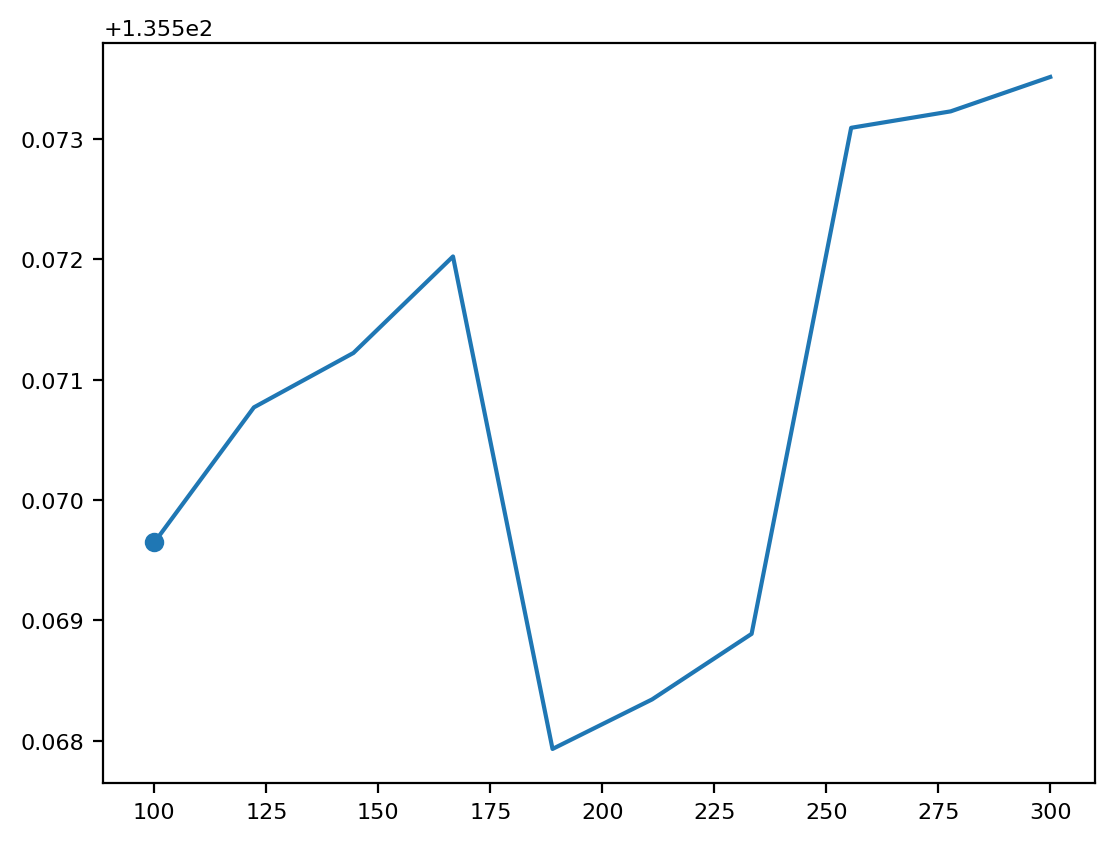

In [15]:
opt_sum = np.sum(opt.SA.values)
for_scatter = (opt.attrs['g_Na'],opt_sum)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for a in tqdm(grid_a):
    # non random mutation
    mutant.attrs['g_Na'] = a
    # Evaluate NU test suite
    try:
        mutant.self_evaluate()
        fit = np.sum(mutant.SA.values)

    except:
        fit = 100
    # sum components (optional)
    collect.append(fit)
plt.plot(grid_a,collect)
plt.scatter(for_scatter[0],for_scatter[1],label='optima')
    

In [16]:
%time
pred = opt.tests[0].generate_prediction(opt.dtc_to_model())
print(pred)

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.68 µs
{'value': array(78.57142857) * pA}


In [48]:
from neuronunit.tests.fi import RheobaseTestP, RheobaseTest
rtp = RheobaseTestP(opt.tests[0].observation)
rts = RheobaseTest(opt.tests[0].observation)
print(opt.tests[0])

RheobaseTestP


In [51]:
%%time
for p in results['pop'][0:9]:
    pred = rtp.generate_prediction(p.dtc.dtc_to_model())
    print(pred)

{'value': array(235.71428571) * pA}
{'value': array(78.57142857) * pA}
{'value': array(78.57142857) * pA}
{'value': array(157.14285714) * pA}
{'value': array(78.57142857) * pA}
{'value': array(314.28571429) * pA}
{'value': array(235.71428571) * pA}
{'value': array(78.57142857) * pA}
CPU times: user 940 ms, sys: 553 ms, total: 1.49 s
Wall time: 58.3 s


In [50]:
%%time
for p in results['pop'][0:9]:
    pred = rts.generate_prediction(p.dtc.dtc_to_model())
    print(pred)

{'value': array(1.90887451) * pA}
{'value': array(112.5) * pA}
{'value': array(112.5) * pA}
{'value': array(2.41699219) * pA}
{'value': array(112.5) * pA}
{'value': array(4.21600342) * pA}
{'value': array(1.64108276) * pA}
{'value': array(112.5) * pA}
CPU times: user 5min 30s, sys: 200 ms, total: 5min 30s
Wall time: 5min 30s
